In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("Titanic-Dataset.csv")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


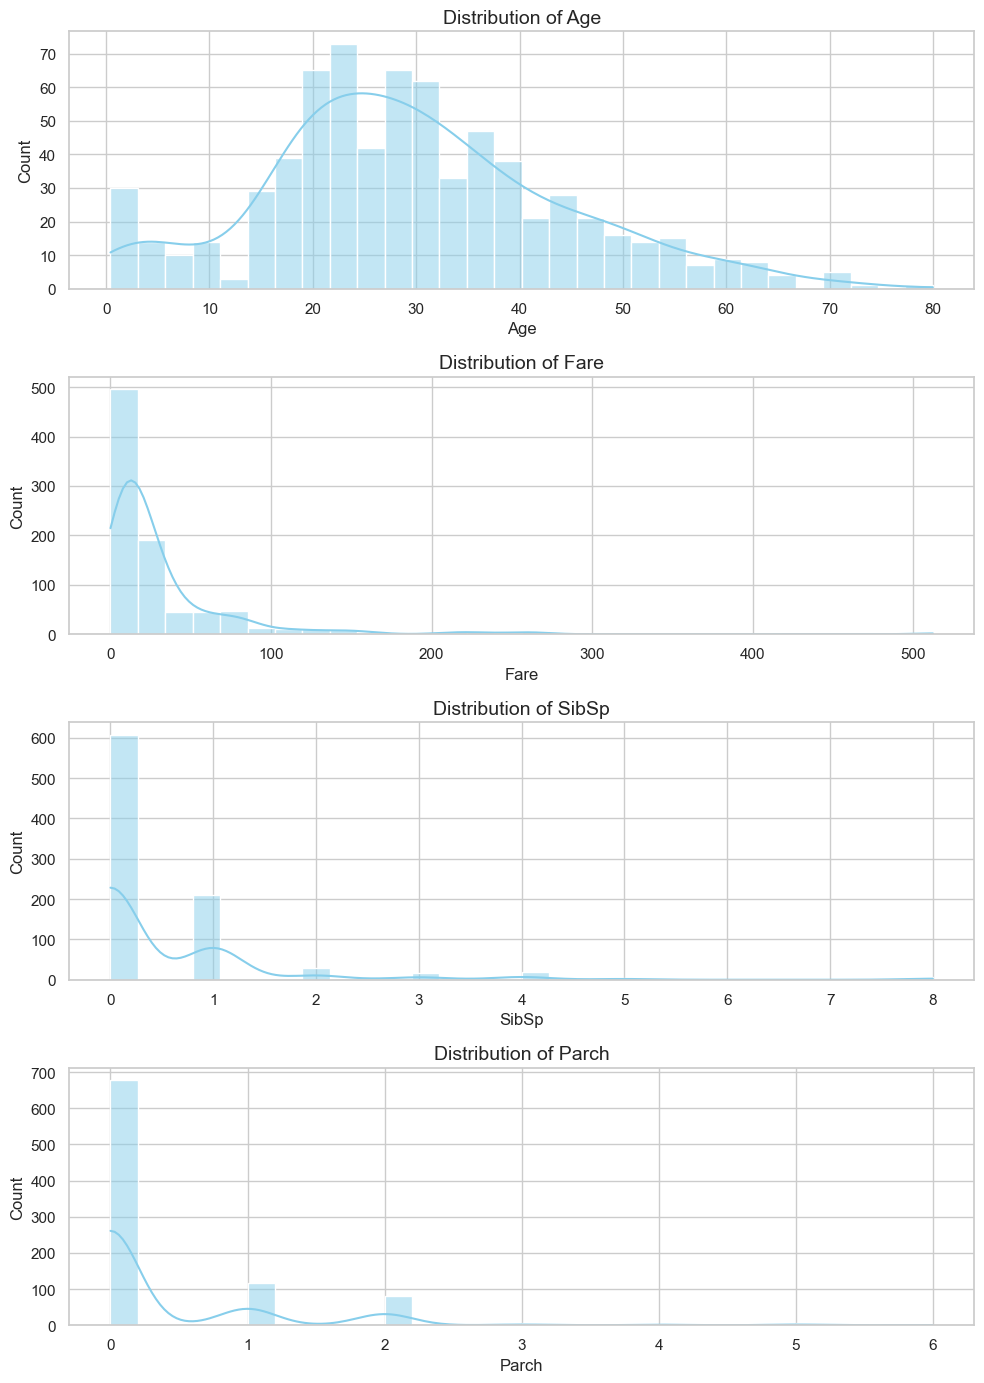

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
# Set up aesthetic style
sns.set(style="whitegrid")

# Summary statistics for numeric features
summary_stats = df.describe()

# Histogram for numeric columns
numeric_cols = ['Age', 'Fare', 'SibSp', 'Parch']
fig, axs = plt.subplots(len(numeric_cols), 1, figsize=(10, 14))
for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], kde=True, ax=axs[i], bins=30, color='skyblue')
    axs[i].set_title(f'Distribution of {col}', fontsize=14)
plt.tight_layout()
plt.show()

summary_stats

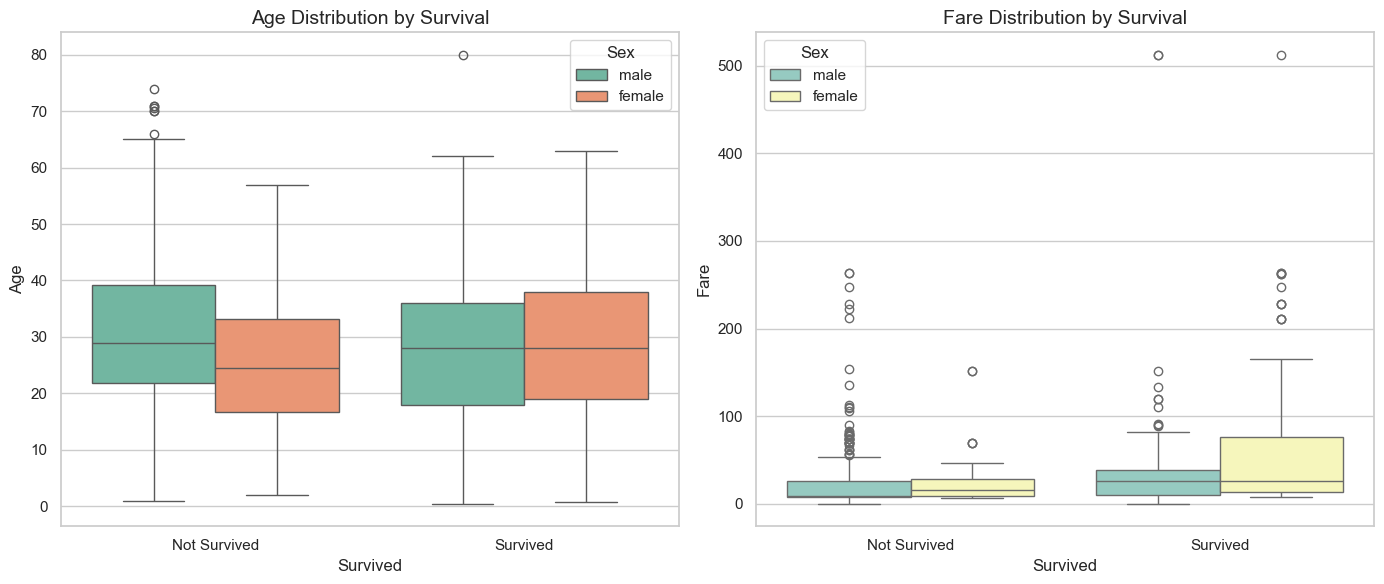

In [14]:
# Boxplots for outlier detection and class distribution
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Age vs Survived
sns.boxplot(x='Survived', y='Age', data=df, ax=axs[0], hue='Sex', palette='Set2')
axs[0].set_title('Age Distribution by Survival', fontsize=14)
axs[0].set_xticks([0, 1])
axs[0].set_xticklabels(['Not Survived', 'Survived'])

# Fare vs Survived
sns.boxplot(x='Survived', y='Fare', data=df, ax=axs[1], hue='Sex', palette='Set3')
axs[1].set_title('Fare Distribution by Survival', fontsize=14)
axs[1].set_xticks([0, 1])
axs[1].set_xticklabels(['Not Survived', 'Survived'])

plt.tight_layout()
plt.show()

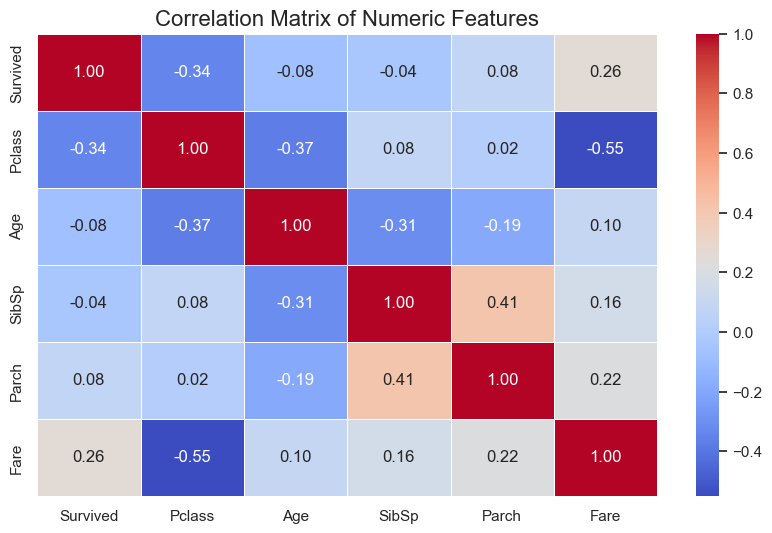

In [8]:
# Correlation matrix for numeric features
corr_matrix = df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numeric Features", fontsize=16)
plt.show()

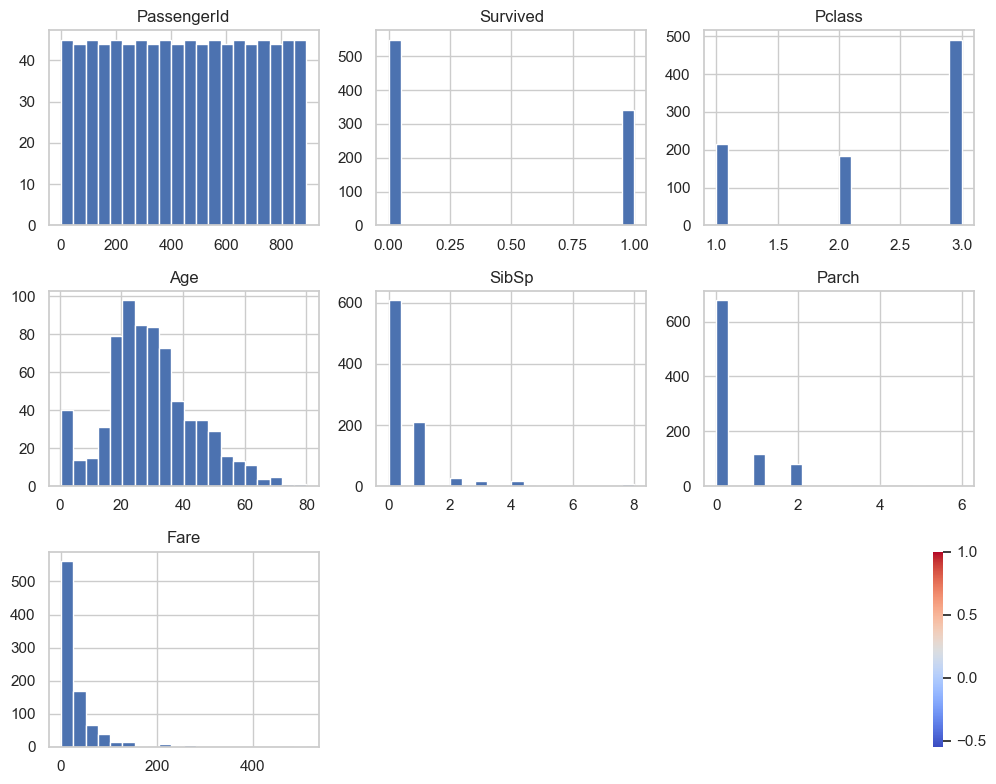

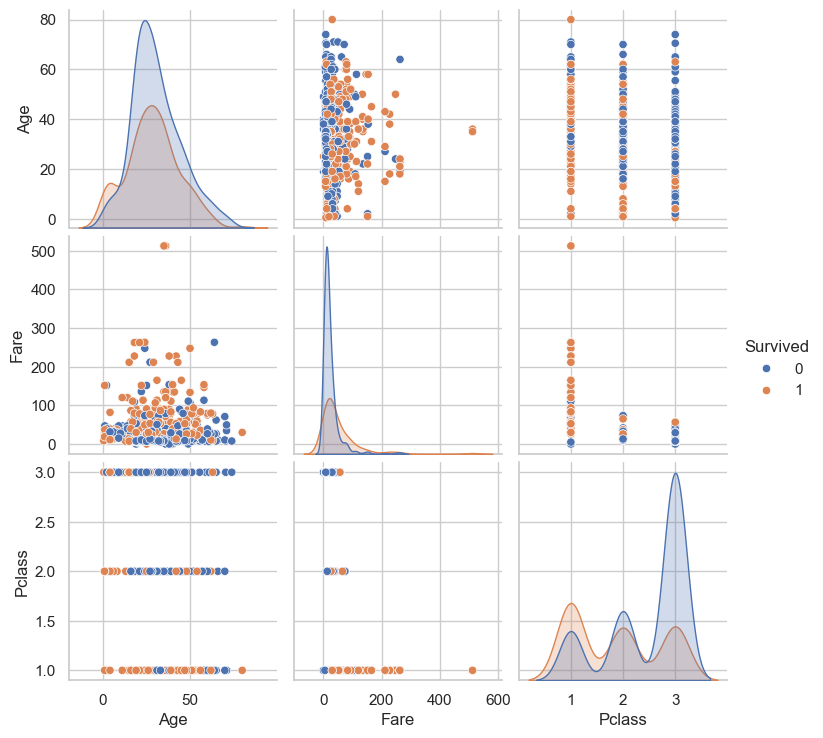

In [16]:
# Histogram
df.hist(bins=20, figsize=(10,8))
plt.tight_layout()

# Boxplot for Fare
sns.boxplot(x=df['Age'])

# Correlation matrix
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')

# Pairplot
sns.pairplot(df[['Age', 'Fare', 'Pclass', 'Survived']].dropna(), hue='Survived')